## Clustering Introduction

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import k_means, KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle



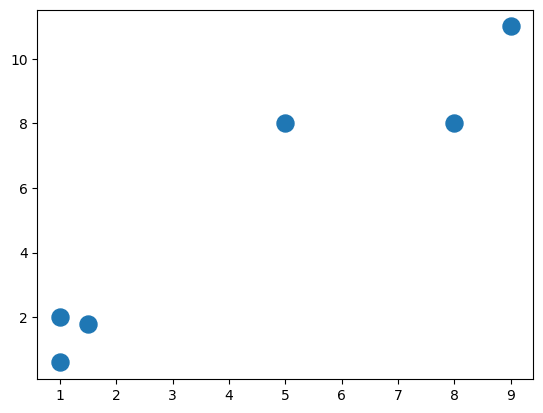

In [8]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

plt.scatter(x[:,0],x[:,1],s=150)
plt.show()

[[1.16666667 1.46666667]
 [8.5        9.5       ]
 [5.         8.        ]]
[0 0 2 1 0 1]


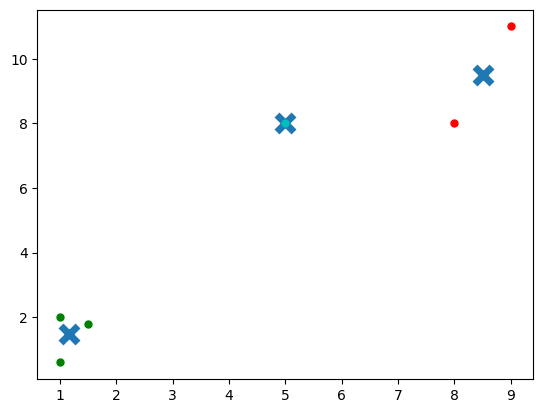

In [19]:
model = KMeans(n_clusters=3)
model.fit(x)

centroids = model.cluster_centers_
print(centroids)
labels = model.labels_
print(labels)

colors = ['g.','r.','c.','b.','k.','o.']
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5)

In [ ]:
df = pd.read_excel('titanic.xls')
df.drop(['name','body'],axis=1,inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [72]:
df.fillna(0,inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [ ]:
############ Not Working

label_encoder = preprocessing.LabelEncoder()
sex_label = label_encoder.fit_transform(df['sex'])
embarked_label = label_encoder.fit_transform(df['embarked'])
df.drop(['sex','embarked'],axis=1,inplace=True)
df['sex'] = sex_label
df['embarked'] = embarked_label

df.head()


In [81]:
def handle_categorical_data(df):
    columns = df.columns.values
    for column in columns:
        text_vals = {}
        def convert_to_int(val):
            return text_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_vals:
                    text_vals[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int,df[column]))
            
    return df
            
            
            
    
df = handle_categorical_data(df)
df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,757,211.3375,20,3,2,27
1,1,1,1,0.9167,1,2,522,151.5500,98,3,3,123
2,1,0,0,2.0000,1,2,522,151.5500,98,3,0,123
3,1,0,1,30.0000,1,2,522,151.5500,98,3,0,123
4,1,0,0,25.0000,1,2,522,151.5500,98,3,0,123
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.5000,1,0,873,14.4542,0,1,0,0
1305,3,0,0,0.0000,1,0,873,14.4542,0,1,0,0
1306,3,0,1,26.5000,0,0,277,7.2250,0,1,0,0
1307,3,0,1,27.0000,0,0,166,7.2250,0,1,0,0


In [ ]:
## No scale No Standard

x = np.array(df.drop('survived',axis=1))
y = np.array(df['survived'])

model = KMeans(n_clusters=2)
model.fit(x)

correct = 0
for i in range(len(x)):
    x_pred = np.array(x[i]).reshape(1,len(x[i]))
    prediction = model.predict(x_pred)

    if prediction == y[i]:
        correct += 1

print(correct/len(x))


0.5126050420168067


In [ ]:
## Yes scale No Standard

x = np.array(df.drop('survived',axis=1))
x = preprocessing.scale(x)
y = np.array(df['survived'])

model = KMeans(n_clusters=2)
model.fit(x)

correct = 0
for i in range(len(x)):
    x_pred = np.array(x[i]).reshape(1,len(x[i]))
    prediction = model.predict(x_pred)
    if prediction == y[i]:
        correct += 1

print(correct/len(x))


0.7142857142857143


In [ ]:
## No Scale Yes Standard

x = np.array(df.drop('survived',axis=1))
y = np.array(df['survived'])

scale = preprocessing.StandardScaler()
x = scale.fit_transform(x)

model = KMeans(n_clusters=2)
model.fit(x)

correct = 0
for i in range(len(x)):
    x_pred = np.array(x[i]).reshape(1,len(x[i]))
    prediction = model.predict(x_pred)
    if prediction == y[i]:
        correct += 1

print(correct/len(x))


0.2857142857142857


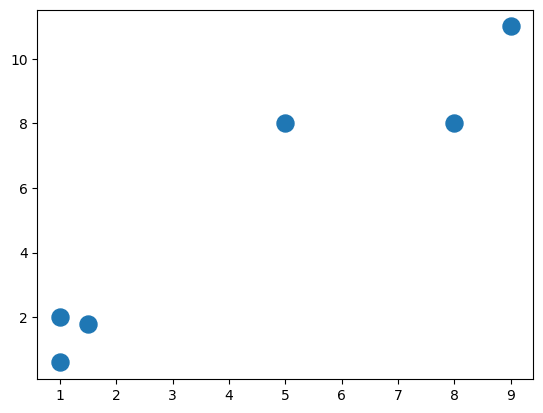

In [130]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

plt.scatter(x[:,0],x[:,1],s=150)
plt.show()

colors = ['g','r','c','b','k','o']

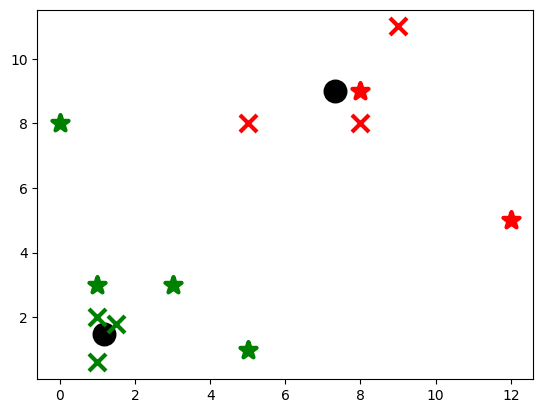

In [135]:
class k_means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def fit(self,data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for feature in x:
                distances = [np.linalg.norm(feature-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(feature)
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            for c in self.centroids:
                original_centroids = prev_centroids[c]
                current_centroids = self.centroids[c]
                if np.sum((current_centroids-original_centroids)/original_centroids*100) > self.tol:
                    optimized = False
            if optimized:
                break
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

model = k_means()
model.fit(x)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0],model.centroids[centroid][1],marker='o',color='k',s=150,linewidths=5)
for classification in model.classifications:
    color = colors[classification]
    for feature in model.classifications[classification]:
        plt.scatter(feature[0],feature[1],marker='x',c=color,s=150,linewidths=3)
        

unknowns = np.array([[1,3],[8,9],[0,8],[5,1],[3,3],[12,5]])

for unknown in unknowns:
    classification = model.predict(unknown)
    plt.scatter(unknown[0],unknown[1],marker='*',c=colors[classification],s=150,linewidths=3)

plt.show()

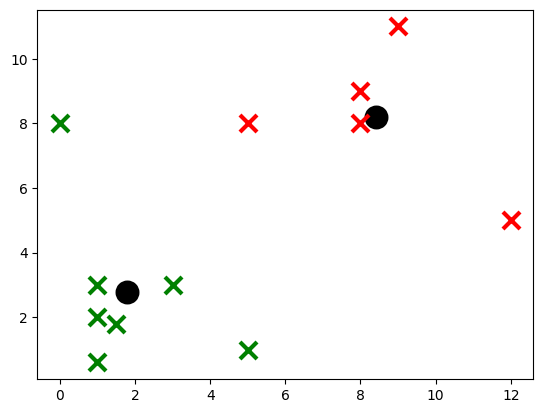

In [136]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[1,3],[8,9],[0,8],[5,1],[3,3],[12,5]])

model = k_means()
model.fit(x)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0],model.centroids[centroid][1],marker='o',color='k',s=150,linewidths=5)
for classification in model.classifications:
    color = colors[classification]
    for feature in model.classifications[classification]:
        plt.scatter(feature[0],feature[1],marker='x',c=color,s=150,linewidths=3)
        
plt.show()

In [3]:
print(1)

1
